# **Preparação do ambiente**
---

In [ ]:
import pandas as pd 
from sklearn import preprocessing
from scipy.spatial import distance_matrix
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc 
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import plotly.graph_objects as go
from sklearn import metrics

In [ ]:
caminho = "/content/sample_data/indicadoressegurancapublicauf.xlsx"

dataset_ocorrencias = pd.read_excel(caminho, sheet_name=0)
dataset_vitimas = pd.read_excel(caminho, sheet_name=1)

# **Entendendo os dados**

---


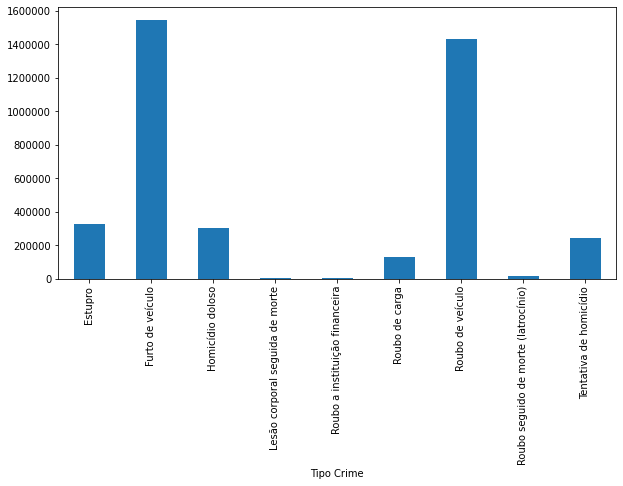

In [ ]:
plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain')
grafico_crime_ocorrencias = dataset_ocorrencias.groupby('Tipo Crime')['Ocorrências'].sum()
grafico_crime_ocorrencias.plot(kind='bar',stacked='True')

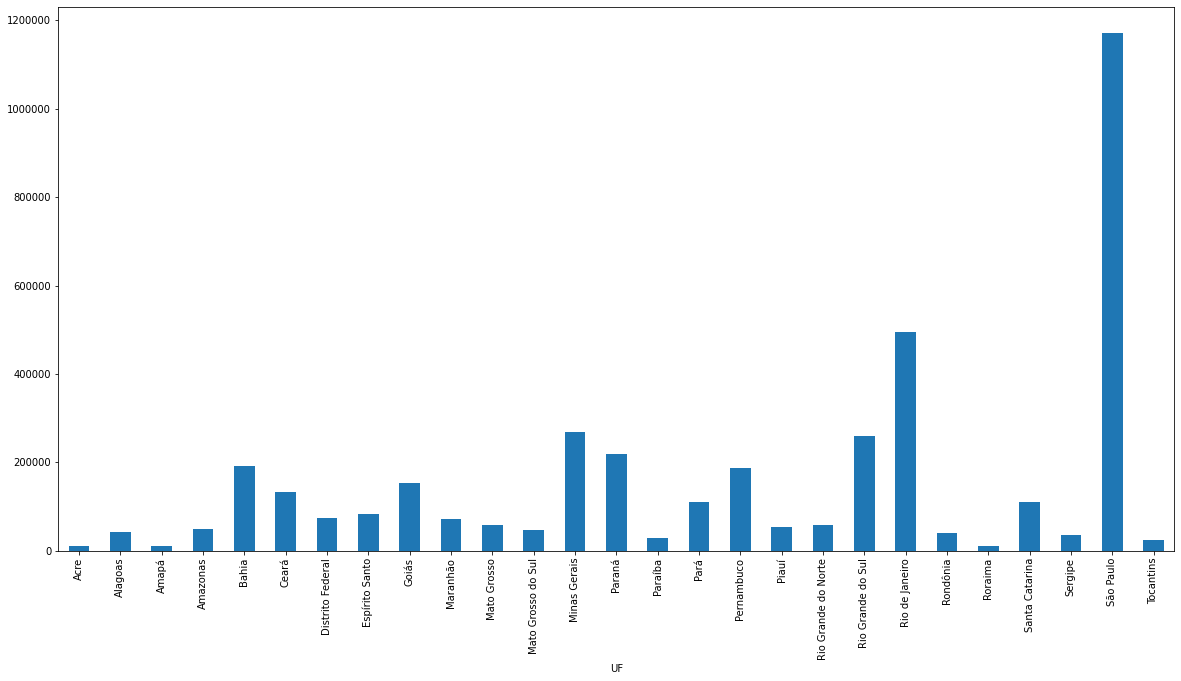

In [ ]:
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain')
grafico_uf_ocorrencias = dataset_ocorrencias.groupby('UF')['Ocorrências'].sum()
grafico_uf_ocorrencias.plot(kind='bar',stacked='True')

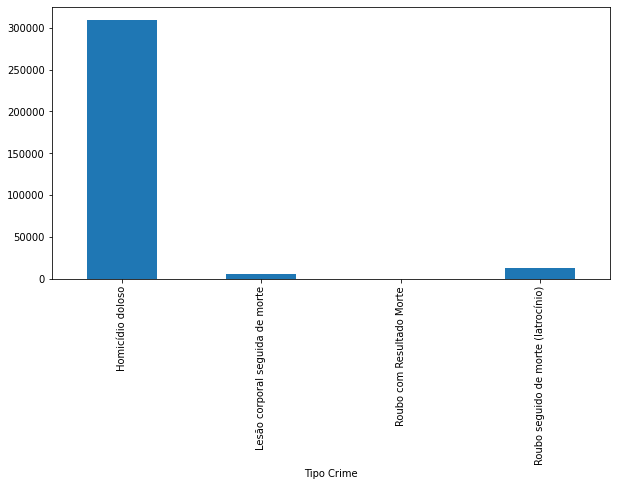

In [ ]:
plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain')
grafico_crime_vitimas = dataset_vitimas.groupby('Tipo Crime')['Vítimas'].sum()
grafico_crime_vitimas.plot(kind='bar',stacked='True')

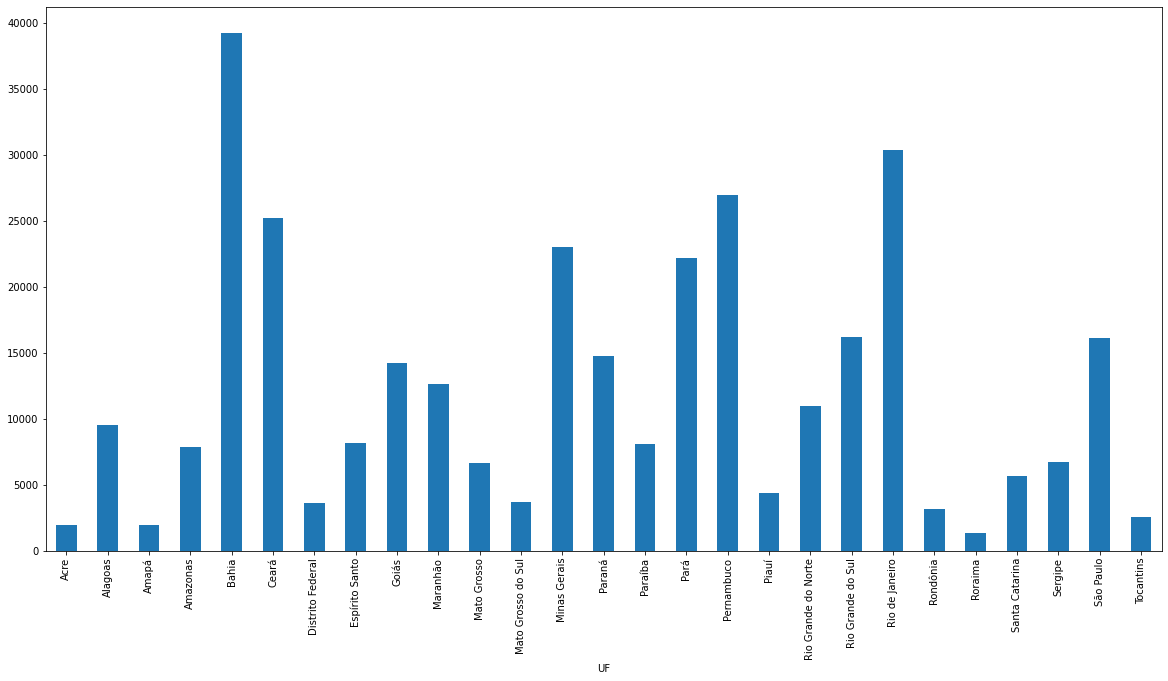

In [ ]:
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain')
grafico_uf_vitimas = dataset_vitimas.groupby('UF')['Vítimas'].sum()
grafico_uf_vitimas.plot(kind='bar',stacked='True')

# **Criação de um dataset único**
---


In [ ]:
estados = ['Acre','Alagoas','Amapá','Amazonas','Bahia','Ceará','Distrito Federal','Espírito Santo','Goiás','Maranhão','Mato Grosso','Mato Grosso do Sul',
                'Minas Gerais','Pará','Paraíba','Paraná','Pernambuco','Piauí','Rio de Janeiro','Rio Grande do Norte','Rio Grande do Sul','Rondônia','Roraima',
                'Santa Catarina','São Paulo','Sergipe','Tocantins']

datasetFinal = pd.DataFrame(columns=['UF','Estupros','Furtos de Veículo','Homicídios Dolosos','Lesões corporais seguidas de morte','Roubos a instituições financeiras',
                                  'Roubos de Cargas','Roubos de Veículos','Roubos Seguidos de Morte','Tentativas de Homicídios','Vítimas'])

for i in range(len(estados)):
  estado = estados[i]
  estupros = dataset_ocorrencias[(dataset_ocorrencias['Tipo Crime'] == 'Estupro') & (dataset_ocorrencias['UF'] == estado)].groupby('Tipo Crime')['Ocorrências'].sum().get('Estupro')
  furtos_veiculos = dataset_ocorrencias[(dataset_ocorrencias['Tipo Crime'] == 'Furto de veículo') & (dataset_ocorrencias['UF'] == estado)].groupby('Tipo Crime')['Ocorrências'].sum().get('Furto de veículo')
  homicidios_dolosos = dataset_ocorrencias[(dataset_ocorrencias['Tipo Crime'] == 'Homicídio doloso') & (dataset_ocorrencias['UF'] == estado)].groupby('Tipo Crime')['Ocorrências'].sum().get('Homicídio doloso')
  lesoes_corporais = dataset_ocorrencias[(dataset_ocorrencias['Tipo Crime'] == 'Lesão corporal seguida de morte') & (dataset_ocorrencias['UF'] == estado)].groupby('Tipo Crime')['Ocorrências'].sum().get('Lesão corporal seguida de morte')
  roubos_a_ifs = dataset_ocorrencias[(dataset_ocorrencias['Tipo Crime'] == 'Roubo a instituição financeira') & (dataset_ocorrencias['UF'] == estado)].groupby('Tipo Crime')['Ocorrências'].sum().get('Roubo a instituição financeira')
  roubos_de_cargas = dataset_ocorrencias[(dataset_ocorrencias['Tipo Crime'] == 'Roubo de carga') & (dataset_ocorrencias['UF'] == estado)].groupby('Tipo Crime')['Ocorrências'].sum().get('Roubo de carga')
  roubos_veiculos = dataset_ocorrencias[(dataset_ocorrencias['Tipo Crime'] == 'Roubo de veículo') & (dataset_ocorrencias['UF'] == estado)].groupby('Tipo Crime')['Ocorrências'].sum().get('Roubo de veículo')
  roubos_seguidos_mortes = dataset_ocorrencias[(dataset_ocorrencias['Tipo Crime'] == 'Roubo seguido de morte (latrocínio)') & (dataset_ocorrencias['UF'] == estado)].groupby('Tipo Crime')['Ocorrências'].sum().get('Roubo seguido de morte (latrocínio)')
  tentativas_homicidios = dataset_ocorrencias[(dataset_ocorrencias['Tipo Crime'] == 'Tentativa de homicídio') & (dataset_ocorrencias['UF'] == estado)].groupby('Tipo Crime')['Ocorrências'].sum().get('Tentativa de homicídio')
  vitimas = dataset_vitimas[dataset_vitimas['UF'] == estado].groupby('UF')['Vítimas'].sum().get(estado)
  
  datasetFinal.loc[i] = [estado,estupros,furtos_veiculos,homicidios_dolosos,lesoes_corporais,roubos_a_ifs,roubos_de_cargas,roubos_veiculos,roubos_seguidos_mortes,tentativas_homicidios,vitimas]

display(datasetFinal)



,UF,Estupros,Furtos de Veículo,Homicídios Dolosos,Lesões corporais seguidas de morte,Roubos a instituições financeiras,Roubos de Cargas,Roubos de Veículos,Roubos Seguidos de Morte,Tentativas de Homicídios,Vítimas
0,Acre,1303,2481,1913,8,13,8,4662,84,579,1931
1,Alagoas,3909,7694,9084,63,99,423,18570,262,3452,9577
2,Amapá,2344,4031,1652,111,59,31,2088,127,1406,1959
3,Amazonas,5564,15059,7033,159,353,70,19350,404,1863,7852
4,Bahia,18863,33767,35557,573,141,2183,83660,1060,16765,39263
5,Ceará,10673,29851,23418,213,245,1220,58461,395,8359,25222
6,Distrito Federal,4201,35653,2980,38,20,301,26118,215,5232,3630
7,Espírito Santo,4048,28838,7730,85,156,162,26515,263,15710,8142
8,Goiás,4172,63074,13277,258,299,2410,55678,498,13869,14217
9,Maranhão,8041,17287,11846,175,416,298,25701,608,6898,12639


# **Normalização dos dados**

---



In [ ]:
x = datasetFinal[['Estupros','Furtos de Veículo','Homicídios Dolosos','Lesões corporais seguidas de morte','Roubos a instituições financeiras',
                                  'Roubos de Cargas','Roubos de Veículos','Roubos Seguidos de Morte','Tentativas de Homicídios','Vítimas']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataset_final_normalizado = pd.DataFrame(x_scaled, index=datasetFinal.index, columns=['Estupros','Furtos de Veículo','Homicídios Dolosos','Lesões corporais seguidas de morte','Roubos a instituições financeiras',
                                  'Roubos de Cargas','Roubos de Veículos','Roubos Seguidos de Morte','Tentativas de Homicídios','Vítimas'])
dataset_final_normalizado.insert(loc=0, column='UF', value=datasetFinal['UF'])
dataset_final_normalizado

,UF,Estupros,Furtos de Veículo,Homicídios Dolosos,Lesões corporais seguidas de morte,Roubos a instituições financeiras,Roubos de Cargas,Roubos de Veículos,Roubos Seguidos de Morte,Tentativas de Homicídios,Vítimas
0,Acre,0.000000,0.000000,0.020496,0.000000,0.000000,0.000091,0.006831,0.002372,0.000000,0.014753
1,Alagoas,0.037045,0.008472,0.229271,0.050691,0.174089,0.007684,0.043739,0.107948,0.118906,0.216542
2,Amapá,0.014798,0.002519,0.012897,0.094931,0.093117,0.000512,0.000000,0.027877,0.034227,0.015492
3,Amazonas,0.060572,0.020441,0.169559,0.139171,0.688259,0.001226,0.045809,0.192171,0.053141,0.171017
4,Bahia,0.249623,0.050844,1.000000,0.520737,0.259109,0.039885,0.216472,0.581257,0.669895,1.000000
5,Ceará,0.133199,0.044480,0.646588,0.188940,0.469636,0.022266,0.149600,0.186833,0.321993,0.629437
6,Distrito Federal,0.041196,0.053909,0.051560,0.027650,0.014170,0.005452,0.063770,0.080071,0.192575,0.059592
7,Espírito Santo,0.039021,0.042834,0.189851,0.070968,0.289474,0.002909,0.064823,0.108541,0.626231,0.178670
8,Goiás,0.040784,0.098472,0.351345,0.230415,0.578947,0.044038,0.142215,0.247924,0.550037,0.338999
9,Maranhão,0.095784,0.024062,0.309683,0.153917,0.815789,0.005397,0.062663,0.313167,0.261526,0.297353


# **Execução do K-Means**

---



In [ ]:
for k in range(2, 10):

  kmeans = KMeans(n_clusters=k)
  kmeans.fit(dataset_final_normalizado[['Estupros','Furtos de Veículo','Homicídios Dolosos','Lesões corporais seguidas de morte','Roubos a instituições financeiras',
                                  'Roubos de Cargas','Roubos de Veículos','Roubos Seguidos de Morte','Tentativas de Homicídios','Vítimas']])
  score_mean = metrics.silhouette_score(dataset_final_normalizado[['Estupros','Furtos de Veículo','Homicídios Dolosos','Lesões corporais seguidas de morte','Roubos a instituições financeiras',
                                  'Roubos de Cargas','Roubos de Veículos','Roubos Seguidos de Morte','Tentativas de Homicídios','Vítimas']], kmeans.labels_, metric='euclidean')
  print(k, score_mean)

2 0.4996480031774324
3 0.4417151755897642
4 0.34396092413934687
5 0.33395859030718544
6 0.38666389600339995
7 0.34857552548011983
8 0.33596840617771767
9 0.34680991237408987


In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(dataset_final_normalizado[['Estupros','Furtos de Veículo','Homicídios Dolosos','Lesões corporais seguidas de morte','Roubos a instituições financeiras',
                                  'Roubos de Cargas','Roubos de Veículos','Roubos Seguidos de Morte','Tentativas de Homicídios','Vítimas']])

KMeans(n_clusters=2)

In [ ]:
clusters = kmeans.labels_.tolist()
clusters_dict = { 'UF': list(dataset_final_normalizado.UF), 'Cluster': clusters}
dataframe_clusters = pd.DataFrame(clusters_dict, columns = ['UF','Cluster'])
dataframe_clusters

,UF,Cluster
0,Acre,1
1,Alagoas,1
2,Amapá,1
3,Amazonas,1
4,Bahia,0
5,Ceará,1
6,Distrito Federal,1
7,Espírito Santo,1
8,Goiás,1
9,Maranhão,1
